In [358]:
#This dataset shows approximate, average, weekday boardings by bus stop from the month of October 2012
import pandas as pd
import numpy as np
%matplotlib inline

#load the csv into dataframe
df = pd.read_csv('/Users/kriti/Desktop/cta_analysis/cta.csv')
df.shape

(11593, 9)

In [359]:
df.columns

Index(['stop_id', 'on_street', 'cross_street', 'routes', 'boardings',
       'alightings', 'month_beginning', 'daytype', 'location'],
      dtype='object')

In [360]:
df.head()

,stop_id,on_street,cross_street,routes,boardings,alightings,month_beginning,daytype,location
0,1,JACKSON,AUSTIN,126,183.4,150.0,10/01/2012,Weekday,"(41.87632184, -87.77410482)"
1,2,JACKSON,MAYFIELD (EXTENDED),126,5.3,0.2,10/01/2012,Weekday,"(41.87706679, -87.77131794)"
2,3,JACKSON,MENARD,126,8.3,0.7,10/01/2012,Weekday,"(41.87695725, -87.76975039)"
3,4,JACKSON,5700 WEST,126,17.9,3.0,10/01/2012,Weekday,"(41.87702418, -87.76745055)"
4,6,JACKSON,LOTUS,126,74.0,11.2,10/01/2012,Weekday,"(41.87651300, -87.76144600)"


In [361]:
#missing values in the column
def missing(x):
    return sum(x.isnull())

df.apply(missing, axis = 0)

stop_id            0
on_street          0
cross_street       0
routes             2
boardings          0
alightings         0
month_beginning    0
daytype            0
location           0
dtype: int64

In [362]:
#replace '' values with nan
df['routes'].replace(r'^\s+$', np.nan, regex=True).head()

0    126
1    126
2    126
3    126
4    126
Name: routes, dtype: object

In [363]:
#Since only two values are missing it can be dropped
df.dropna(how = 'any', inplace = True)
df.apply(missing, axis = 0)

stop_id            0
on_street          0
cross_street       0
routes             0
boardings          0
alightings         0
month_beginning    0
daytype            0
location           0
dtype: int64

In [364]:
#Notice that routes are comma separated list. Before we proceed they should be split in separate rows
df.iloc[60:65]

,stop_id,on_street,cross_street,routes,boardings,alightings,month_beginning,daytype,location
60,74,CONGRESS PLAZA,MICHIGAN,"7,126,132,143,147",138.8,250.3,10/01/2012,Weekday,"(41.87485809, -87.62355113)"
61,75,MICHIGAN,VAN BUREN,"1,7,X28,126,129",290.4,90.8,10/01/2012,Weekday,"(41.87669000, -87.62416000)"
62,76,MICHIGAN,JACKSON,"3,4,6,J14,26,143",427.4,1794.2,10/01/2012,Weekday,"(41.87813500, -87.62419300)"
63,77,ADAMS,WABASH,"1,7,X28,126,129,151",857.7,752.4,10/01/2012,Weekday,"(41.87957500, -87.62588400)"
64,80,ADAMS,WELLS,"1,7,X28,126,129,130,134,135,136,151,156",343.9,1172.2,10/01/2012,Weekday,"(41.87942600, -87.63402400)"


In [365]:
#This function is used to split the comma separated routes into new rows 

def splitDataFrameList(df, target_column, sep=None):
    """
    df - dataframe to split
    target_column = column with list values that has to be separated
    sep = the symbol used to perform the split
    returns a new df where the values the target column are split into new rows. The rest of the values
    are duplicated in the new rows
    """
    #a new list
    row_accumulator = []
    
    #function that performs the split
    def splitrows(rows, sep = None):
        split_row = rows['routes'].split(sep)
        
        for s in split_row:
            new_row = rows.to_dict()
            new_row['routes'] = s
            row_accumulator.append(new_row)
    
    df.apply(splitrows, axis = 1, sep = ',')
    new_df = pd.DataFrame(row_accumulator)
    new_df = new_df[['stop_id', 'on_street', 'cross_street', 'routes', 'boardings',
       'alightings', 'month_beginning', 'daytype', 'location']]
    return new_df

split_df = splitDataFrameList(df, 'routes', sep = ',')
split_df.columns

Index(['stop_id', 'on_street', 'cross_street', 'routes', 'boardings',
       'alightings', 'month_beginning', 'daytype', 'location'],
      dtype='object')

In [374]:
#remove whitespace values which are stored in new rows by mistake
#replace '' values with nan
split_df['routes'].replace('', np.nan, inplace= True)

#drop the nan values
df.dropna(how = 'any', inplace = True)
df.apply(missing, axis = 0)

stop_id            0
on_street          0
cross_street       0
routes             0
boardings          0
alightings         0
month_beginning    0
daytype            0
location           0
dtype: int64

In [410]:
#making sure that whitespace values are dropped
split_df[split_df['routes'] == ''] 

,stop_id,on_street,cross_street,routes,boardings,alightings,month_beginning,daytype,location


In [420]:
#remove whitespaces from all the values
split_df = split_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
split_df[split_df['routes'] == ' 24']

,stop_id,on_street,cross_street,routes,boardings,alightings,month_beginning,daytype,location


In [421]:
#The routes have split correctly
split_df[split_df['stop_id'] == 80]

,stop_id,on_street,cross_street,routes,boardings,alightings,month_beginning,daytype,location
121,80,ADAMS,WELLS,1,343.9,1172.2,10/01/2012,Weekday,"(41.87942600, -87.63402400)"
122,80,ADAMS,WELLS,7,343.9,1172.2,10/01/2012,Weekday,"(41.87942600, -87.63402400)"
123,80,ADAMS,WELLS,X28,343.9,1172.2,10/01/2012,Weekday,"(41.87942600, -87.63402400)"
124,80,ADAMS,WELLS,126,343.9,1172.2,10/01/2012,Weekday,"(41.87942600, -87.63402400)"
125,80,ADAMS,WELLS,129,343.9,1172.2,10/01/2012,Weekday,"(41.87942600, -87.63402400)"
126,80,ADAMS,WELLS,130,343.9,1172.2,10/01/2012,Weekday,"(41.87942600, -87.63402400)"
127,80,ADAMS,WELLS,134,343.9,1172.2,10/01/2012,Weekday,"(41.87942600, -87.63402400)"
128,80,ADAMS,WELLS,135,343.9,1172.2,10/01/2012,Weekday,"(41.87942600, -87.63402400)"
129,80,ADAMS,WELLS,136,343.9,1172.2,10/01/2012,Weekday,"(41.87942600, -87.63402400)"
130,80,ADAMS,WELLS,151,343.9,1172.2,10/01/2012,Weekday,"(41.87942600, -87.63402400)"


In [422]:
#Next step is to split the location into Latitude and longitude columns
split_df[['Latitude', 'Longitude']] = split_df.location.str.split(',', expand = True)
split_df.head()

,stop_id,on_street,cross_street,routes,boardings,alightings,month_beginning,daytype,location,Latitude,Longitude
0,1,JACKSON,AUSTIN,126,183.4,150.0,10/01/2012,Weekday,"(41.87632184, -87.77410482)",(41.87632184,-87.77410482)
1,2,JACKSON,MAYFIELD (EXTENDED),126,5.3,0.2,10/01/2012,Weekday,"(41.87706679, -87.77131794)",(41.87706679,-87.77131794)
2,3,JACKSON,MENARD,126,8.3,0.7,10/01/2012,Weekday,"(41.87695725, -87.76975039)",(41.87695725,-87.76975039)
3,4,JACKSON,5700 WEST,126,17.9,3.0,10/01/2012,Weekday,"(41.87702418, -87.76745055)",(41.87702418,-87.76745055)
4,6,JACKSON,LOTUS,126,74.0,11.2,10/01/2012,Weekday,"(41.87651300, -87.76144600)",(41.87651300,-87.76144600)


In [423]:
#drop the location column
split_df = split_df.drop(columns = 'location')
split_df.head()

,stop_id,on_street,cross_street,routes,boardings,alightings,month_beginning,daytype,Latitude,Longitude
0,1,JACKSON,AUSTIN,126,183.4,150.0,10/01/2012,Weekday,(41.87632184,-87.77410482)
1,2,JACKSON,MAYFIELD (EXTENDED),126,5.3,0.2,10/01/2012,Weekday,(41.87706679,-87.77131794)
2,3,JACKSON,MENARD,126,8.3,0.7,10/01/2012,Weekday,(41.87695725,-87.76975039)
3,4,JACKSON,5700 WEST,126,17.9,3.0,10/01/2012,Weekday,(41.87702418,-87.76745055)
4,6,JACKSON,LOTUS,126,74.0,11.2,10/01/2012,Weekday,(41.87651300,-87.76144600)


In [424]:
#remove the paranthesis from the latitude and longitudes
split_df['Latitude'] = split_df['Latitude'].str.replace('[()]','')
split_df['Latitude'][:10]

0    41.87632184
1    41.87706679
2    41.87695725
3    41.87702418
4    41.87651300
5    41.87655197
6    41.87656400
7    41.87659463
8    41.87662062
9    41.87668892
Name: Latitude, dtype: object

In [425]:
split_df['Longitude'] = split_df['Longitude'].str.replace('[)]', '')
split_df.head()

,stop_id,on_street,cross_street,routes,boardings,alightings,month_beginning,daytype,Latitude,Longitude
0,1,JACKSON,AUSTIN,126,183.4,150.0,10/01/2012,Weekday,41.87632184,-87.77410482
1,2,JACKSON,MAYFIELD (EXTENDED),126,5.3,0.2,10/01/2012,Weekday,41.87706679,-87.77131794
2,3,JACKSON,MENARD,126,8.3,0.7,10/01/2012,Weekday,41.87695725,-87.76975039
3,4,JACKSON,5700 WEST,126,17.9,3.0,10/01/2012,Weekday,41.87702418,-87.76745055
4,6,JACKSON,LOTUS,126,74.0,11.2,10/01/2012,Weekday,41.87651300,-87.76144600


In [452]:
#route with most stops
split_df['routes'].value_counts().sort_values(ascending = False)[:20]

9      273
49     242
151    221
8      220
3      213
82     209
79     206
62     206
N5     206
4      202
29     199
52     194
11     187
30     180
53     177
50     176
15     176
94     174
87     173
22     173
Name: routes, dtype: int64

In [427]:
#stops with most routes
split_df['stop_id'].value_counts().sort_values(ascending = False)[:1]

1106    14
Name: stop_id, dtype: int64

In [443]:
#routes with < 10 stops
split_df['routes'].value_counts().sort_values(ascending = True)[:8]

N49     1
X98     2
N22     2
N151    4
14      4
302     4
128     4
192     9
Name: routes, dtype: int64

In [470]:
#top 10 stop_ids with most boardings
split_df['boardings'].groupby(split_df['stop_id']).mean().sort_values(ascending = False)[:10]

stop_id
14011    3366.3
16140    3192.1
17097    2691.3
1127     2595.3
1106     2559.3
4729     2550.2
17380    2490.0
5009     2433.6
1225     2356.3
1425     2163.0
Name: boardings, dtype: float64

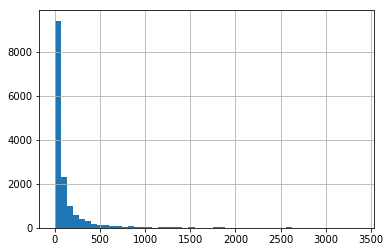

In [343]:
split_df.boardings.hist(bins = 50)

In [344]:
#most common on_street
split_df['on_street'].mode()

0    MICHIGAN
dtype: object

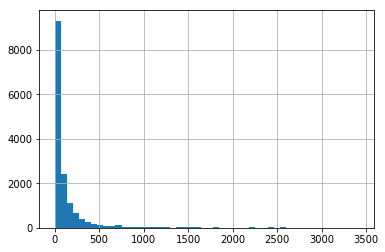

In [345]:
#right skewed 
split_df.alightings.hist(bins = 50)

In [346]:
#most common cross_street
split_df['cross_street'].mode()

0    STATE
dtype: object

In [454]:
#top 10 boarding stops
split_df.nlargest(10, 'boardings')

,stop_id,on_street,cross_street,routes,boardings,alightings,month_beginning,daytype,Latitude,Longitude
12608,14011,95TH STREET,RED LINE STATION,34,3366.3,3418.3,10/01/2012,Weekday,41.72229945,-87.62476398
12609,14011,95TH STREET,RED LINE STATION,119,3366.3,3418.3,10/01/2012,Weekday,41.72229945,-87.62476398
14582,16140,ROOSEVELT,GREEN/ORANGE/RED LINE,12,3192.1,1777.5,10/01/2012,Weekday,41.86755162,-87.62666395
14583,16140,ROOSEVELT,GREEN/ORANGE/RED LINE,18,3192.1,1777.5,10/01/2012,Weekday,41.86755162,-87.62666395
14584,16140,ROOSEVELT,GREEN/ORANGE/RED LINE,130,3192.1,1777.5,10/01/2012,Weekday,41.86755162,-87.62666395
14585,16140,ROOSEVELT,GREEN/ORANGE/RED LINE,146,3192.1,1777.5,10/01/2012,Weekday,41.86755162,-87.62666395
14586,16140,ROOSEVELT,GREEN/ORANGE/RED LINE,192,3192.1,1777.5,10/01/2012,Weekday,41.86755162,-87.62666395
14700,17097,79TH STREET,RED LINE STATION,79,2691.3,2362.7,10/01/2012,Weekday,41.75089853,-87.62494095
1408,1127,MICHIGAN,CHESTNUT,33,2595.3,1434.3,10/01/2012,Weekday,41.89806900,-87.62396000
1409,1127,MICHIGAN,CHESTNUT,143,2595.3,1434.3,10/01/2012,Weekday,41.89806900,-87.62396000


In [348]:
#top 10 exits stops
split_df.nlargest(10, 'alightings')

,stop_id,on_street,cross_street,routes,boardings,alightings,month_beginning,daytype,Latitude,Longitude
12608,14011,95TH STREET,RED LINE STATION,34,3366.3,3418.3,10/01/2012,Weekday,41.72229945,-87.62476398
12609,14011,95TH STREET,RED LINE STATION,119,3366.3,3418.3,10/01/2012,Weekday,41.72229945,-87.62476398
14629,17037,JEFFERSON PARK,BLUE LINE STATION/NORTH B,68,115.8,2580.2,10/01/2012,Weekday,41.97003140,-87.76215931
14630,17037,JEFFERSON PARK,BLUE LINE STATION/NORTH B,85A,115.8,2580.2,10/01/2012,Weekday,41.97003140,-87.76215931
14631,17037,JEFFERSON PARK,BLUE LINE STATION/NORTH B,88,115.8,2580.2,10/01/2012,Weekday,41.97003140,-87.76215931
14632,17037,JEFFERSON PARK,BLUE LINE STATION/NORTH B,92,115.8,2580.2,10/01/2012,Weekday,41.97003140,-87.76215931
14957,17379,BELMONT,SHEFFIELD,77,715.9,2575.0,10/01/2012,Weekday,41.93987010,-87.65306242
14633,17038,JEFFERSON PARK,BLUE LINE STATION/SOUTH B,56,91.3,2546.3,10/01/2012,Weekday,41.96982527,-87.76112886
14634,17038,JEFFERSON PARK,BLUE LINE STATION/SOUTH B,56A,91.3,2546.3,10/01/2012,Weekday,41.96982527,-87.76112886
14635,17038,JEFFERSON PARK,BLUE LINE STATION/SOUTH B,81,91.3,2546.3,10/01/2012,Weekday,41.96982527,-87.76112886


In [493]:
#stops with no boardings and alightings which could be possibly removed
stops = split_df[(split_df['boardings'] == 0.0) & (split_df['alightings'] == 0.0)]['stop_id']
stops.count()

41

In [463]:
#mean of means of boardings
boardings_means = split_df['boardings'].mean()
boardings_means

137.88607163905309

In [485]:
split_df[split_df['boardings'] > 500].sort_values(by = 'boardings', ascending = False)

,stop_id,on_street,cross_street,routes,boardings,alightings,month_beginning,daytype,Latitude,Longitude
12609,14011,95TH STREET,RED LINE STATION,119,3366.3,3418.3,10/01/2012,Weekday,41.72229945,-87.62476398
12608,14011,95TH STREET,RED LINE STATION,34,3366.3,3418.3,10/01/2012,Weekday,41.72229945,-87.62476398
14582,16140,ROOSEVELT,GREEN/ORANGE/RED LINE,12,3192.1,1777.5,10/01/2012,Weekday,41.86755162,-87.62666395
14583,16140,ROOSEVELT,GREEN/ORANGE/RED LINE,18,3192.1,1777.5,10/01/2012,Weekday,41.86755162,-87.62666395
14584,16140,ROOSEVELT,GREEN/ORANGE/RED LINE,130,3192.1,1777.5,10/01/2012,Weekday,41.86755162,-87.62666395
14585,16140,ROOSEVELT,GREEN/ORANGE/RED LINE,146,3192.1,1777.5,10/01/2012,Weekday,41.86755162,-87.62666395
14586,16140,ROOSEVELT,GREEN/ORANGE/RED LINE,192,3192.1,1777.5,10/01/2012,Weekday,41.86755162,-87.62666395
14700,17097,79TH STREET,RED LINE STATION,79,2691.3,2362.7,10/01/2012,Weekday,41.75089853,-87.62494095
1408,1127,MICHIGAN,CHESTNUT,33,2595.3,1434.3,10/01/2012,Weekday,41.89806900,-87.62396000
1411,1127,MICHIGAN,CHESTNUT,145,2595.3,1434.3,10/01/2012,Weekday,41.89806900,-87.62396000


In [510]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [509]:
street_map = gpd.read_file('/Users/kriti/Desktop/cta_analysis/CTA_BusRoutes/CTA_BusRoutes.shp')

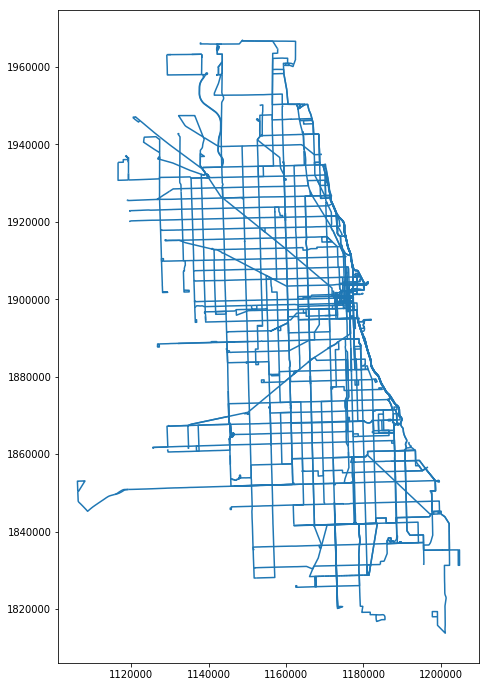

In [516]:
fig, ax = plt.subplots(figsize = (15, 12))
street_map.plot(ax=ax)

In [521]:
#convert lat and long into float values before converting into the coordinate reference system
split_df[['Latitude', 'Longitude']]= split_df[['Latitude', 'Longitude']].astype(float).values
split_df.dtypes

stop_id              int64
on_street           object
cross_street        object
routes              object
boardings          float64
alightings         float64
month_beginning     object
daytype             object
Latitude           float64
Longitude          float64
dtype: object

In [523]:
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip( split_df['Longitude'], split_df['Latitude'] )]
geometry[:3]

In [554]:
geo_df = gpd.GeoDataFrame(split_df,
                         crs = crs,
                         geometry = geometry)
geo_df.shape

(15271, 11)

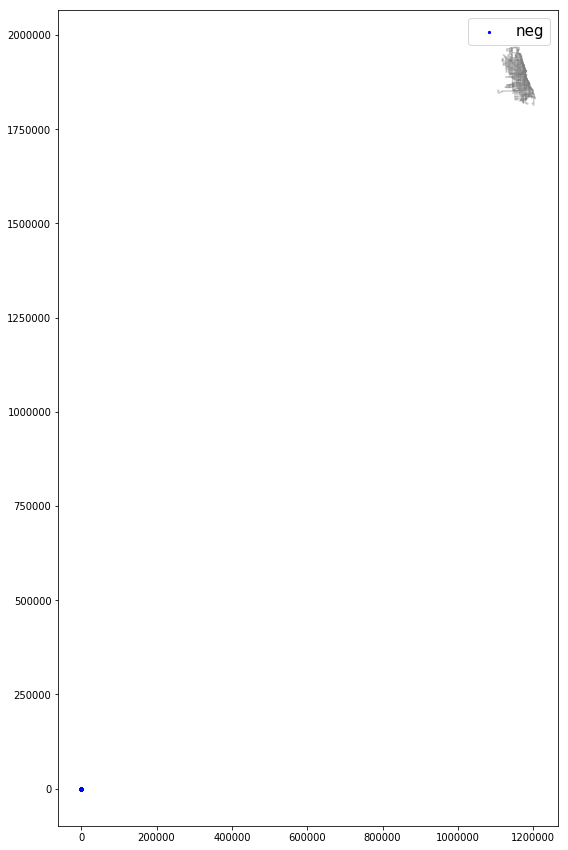

In [560]:
fig,ax = plt.subplots(figsize = (15, 15))
street_map.plot(ax= ax, alpha = 0.4, color = 'grey')

geo_df[geo_df['stop_id'] == 1106].plot(ax = ax, markersize = 20, color = 'blue', marker = '.', label = 'neg')
plt.legend(prop = {'size': 15})